# Tasks

In [1]:
%pylab inline
import pickle
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('train.pkl', 'rb') as fp:
    dataset = pickle.load(fp)
print(dataset.shape)
X_train, y_train = dataset[:,0], dataset[:, 1]
print(X_train.shape, y_train.shape)

(8000, 2)
(8000,) (8000,)


In [3]:
with open('test.pkl', 'rb') as fp:
    dataset1 = pickle.load(fp)
print(dataset1.shape)
X_test, y_test = dataset1[:,0], dataset1[:, 1]
print(X_test.shape, y_test.shape)

(80, 2)
(80,) (80,)


# Task 1: About <i>LinearRegression.fit()</i> 

<p> Given a pair of training data's x values and y values or projections of x values on a higher dimension plane and y values, the linear regression model takes these pairs as arguments and fits them along a straight line / curve (depending on what the order of the x value projection is). The linear regression fit does so by arbitrarily initialising a set of coefficients for these models and calculating the mean squared error for a predicted model. Once the mean squared error has been calculated, the regressor penalizes on the existing model and hence provides us with a new set of coefficients. This is iterated continuously until the penalizing has very little effect / no effect on the existing model.

# Task 2: Bias Variance

## Task 2.2.1: Resampling Data

In [4]:
ts = 10
tsize = X_train.shape[0]
tsels = X_train.shape[0] // ts
# training_sets = np.array([np.asmatrix((X_train[st:st+tsels], 
#     y_train[st:st+tsels])).T for st in range(0, tsize, tsels)])
# Or we can just have it as a set of tuples (x, y)
training_sets = np.array([(X_train[st:st+tsels], 
    y_train[st:st+tsels]) for st in range(0, tsize, tsels)])
print('Set of training sets', training_sets.shape)
print('Training set #0', training_sets[0].shape)

Set of training sets (10, 2, 800)
Training set #0 (2, 800)


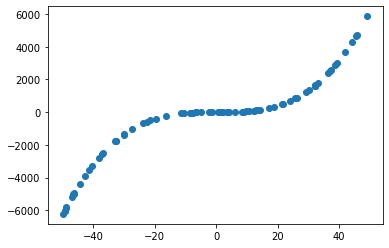

In [5]:
plt.scatter(X_test , y_test)

## Task 2.2.2: Calculating Bias and Variance

In [20]:
bias = []
variance = []
overall_predictions = []
error = []
for deg in range(1 , 21):
    output = []
    pred_dist = []
    mse_degree = []
    for dist in range(0 , 10):
        x_deg_train = training_sets[dist][0]
        y_deg_train = training_sets[dist][1]
        model = LinearRegression().fit(PolynomialFeatures(degree=deg).fit_transform(x_deg_train.reshape(-1,1)) , y_deg_train.reshape(-1,1))
        pred = model.predict(PolynomialFeatures(degree=deg).fit_transform(X_test.reshape(-1, 1)))
        pred_dist.append(pred)
        mse_degree.append(mean_squared_error(pred , y_test))

    error.append(np.mean(mse_degree))    
    pred_dist = np.array(pred_dist).reshape((10,80))
    overall_predictions.append(pred_dist)
    bias.append(np.mean((np.mean(pred_dist , axis=0) - y_test)**2))
    variance.append(np.mean(np.var(pred_dist , axis=0)))



In [21]:
print("Bias Values: " , bias)
print("Variance Values" , variance)

Bias Values:  [1001682.5006488452, 953836.1284241952, 9533.34406629814, 10588.298437411539, 9952.445136760856, 9999.197646853572, 10425.91572935574, 10997.828779254323, 11584.668601982414, 14311.752104010553, 12449.2566692765, 30849.556849435532, 15974.950257559405, 39231.12014339167, 62928.26243846386, 69821.54676952651, 115239.72393877292, 120582.34511236686, 191980.66933986024, 197278.66750847976]
Variance Values [25999.093009987853, 39105.8338132683, 56095.893209726564, 114907.29152950694, 151434.02790058468, 174226.7450030805, 198849.502746488, 221555.66219639877, 232275.80526448158, 232807.77103703152, 238575.67800096906, 219780.32854004306, 236241.20834007993, 212545.262840214, 221715.2969090237, 239357.88399177938, 242993.20230426238, 269048.4823981364, 270099.99653143797, 299017.52041090425]


# Task 2.3: Calculating irreducible error

In [22]:
## Calculate the irreducible error for each of the models

irreducible_error = np.array(error) - (np.array(bias) + np.array(variance))
print("Irreducible errors are :" ,  irreducible_error)
print("The mean of irreducible data (independent of how good the models are) " , np.mean(irreducible_error))

Irreducible errors are : [ 1.16415322e-10  0.00000000e+00 -2.91038305e-11  1.45519152e-11
  2.91038305e-11  0.00000000e+00  0.00000000e+00  2.91038305e-11
  2.91038305e-11  2.91038305e-11  0.00000000e+00  0.00000000e+00
  5.82076609e-11  2.91038305e-11  0.00000000e+00 -5.82076609e-11
  0.00000000e+00  5.82076609e-11 -5.82076609e-11  0.00000000e+00]
The mean of irreducible data (independent of how good the models are)  1.2369127944111824e-11


# Task 2.4: Bias variance tradeoff graph

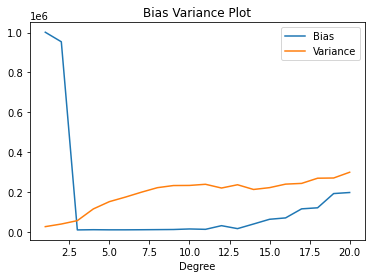

In [23]:
x_plot = linspace(1,20,20)
plt.plot(x_plot,bias, label='Bias')
plt.plot(x_plot,variance, label='Variance')
plt.xlabel('Degree')
plt.title('Bias Variance Plot')
plt.legend()

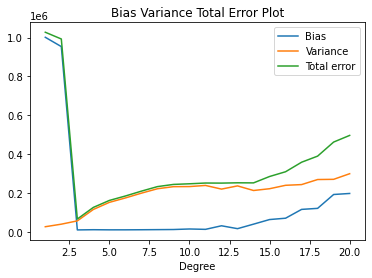

In [25]:
x_plot = linspace(1,20,20)
plt.plot(x_plot,bias, label='Bias')
plt.plot(x_plot,variance, label='Variance')
plt.plot(x_plot,  (np.array(bias) + np.array(variance) + irreducible_error) , label='Total error') 
plt.xlabel('Degree')
plt.title('Bias Variance Total Error Plot')
plt.legend()

### Clearly, it can be observed that the best possible fit is possible when the degree of the polynomial is near 3. While the bias of for further degrees until degree 10 stays low, the variance steadily increases; hence the total error increases too.

# Conclusions

In [26]:
print("Shape of overall predictions:" ,  np.shape(overall_predictions))
mean_predictions = np.mean(overall_predictions , axis=1)
print("Shape of mean predictions for each degree:" ,  np.shape(mean_predictions))

Shape of overall predictions: (20, 10, 80)
Shape of mean predictions for each degree: (20, 80)


# Visualize plots (for report)

In [27]:
def visualize(degree):
    plt.scatter(X_test,mean_predictions[degree-1])
    plt.scatter(X_test,y_test)

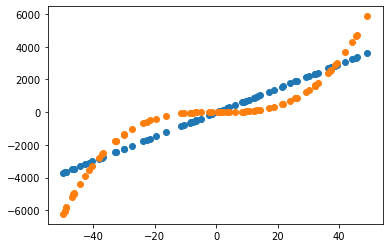

In [28]:
visualize(1)

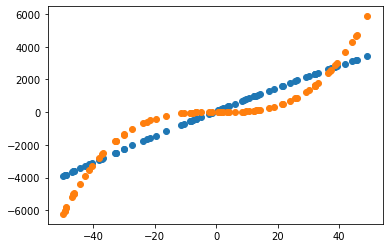

In [29]:
visualize(2)

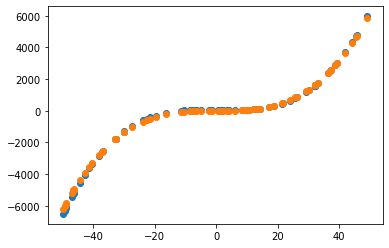

In [31]:
visualize(3)

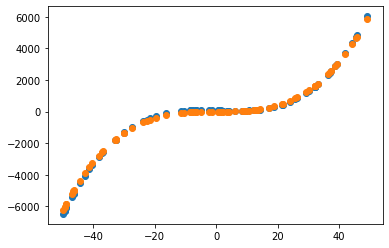

In [32]:
visualize(4)

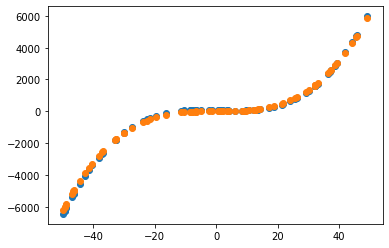

In [33]:
visualize(5)

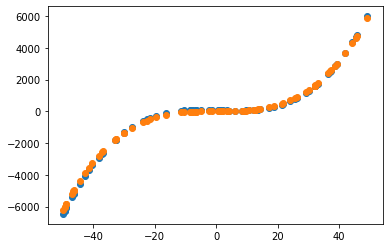

In [34]:
visualize(6)

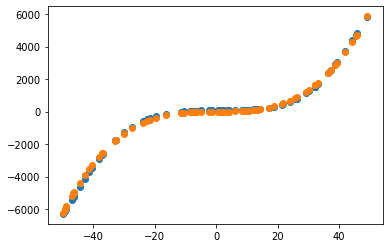

In [35]:
visualize(7)

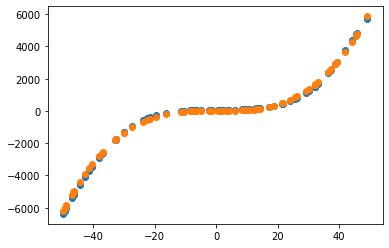

In [36]:
visualize(8)

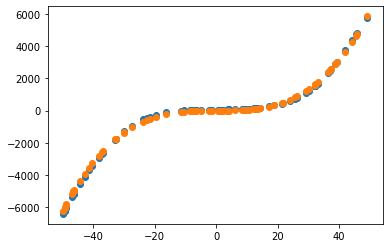

In [37]:
visualize(9)

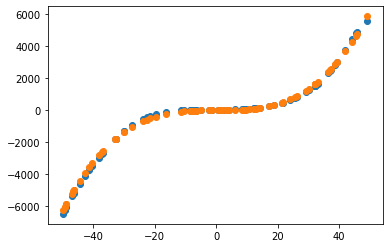

In [39]:
visualize(11)

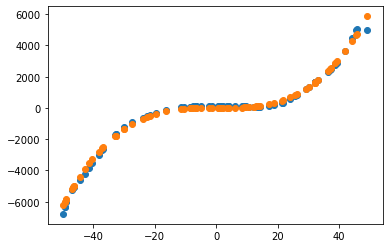

In [40]:
visualize(12)

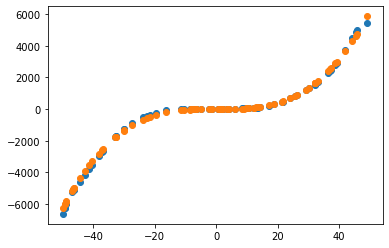

In [41]:
visualize(13)

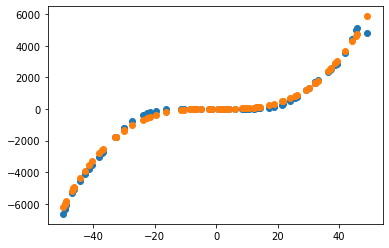

In [42]:
visualize(14)

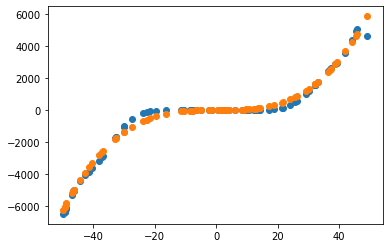

In [43]:
visualize(15)

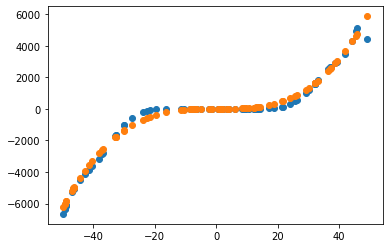

In [44]:
visualize(16)

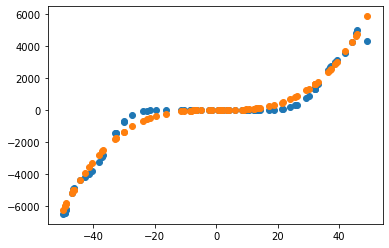

In [45]:
visualize(17)

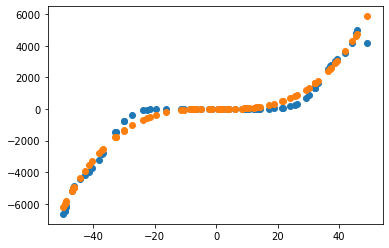

In [46]:
visualize(18)

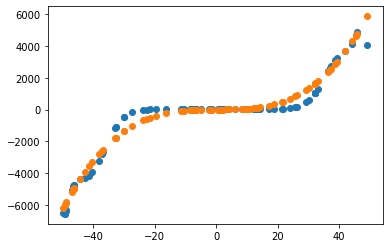

In [47]:
visualize(19)

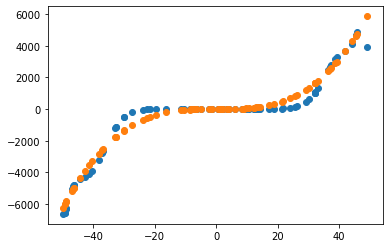

In [48]:
visualize(20)